<a href="https://colab.research.google.com/github/defne04/DSA210-PROJECT/blob/main/data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yeni Bölüm

In [16]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [17]:
# Upload the dataset to Colab
from google.colab import files

# Prompt user to upload file
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('atp_tennis.csv')
print("Dataset Info:")
print(data.info())
print("\nPreview of Dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65065 entries, 0 to 65064
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  65065 non-null  object 
 1   Date        65065 non-null  object 
 2   Series      65065 non-null  object 
 3   Court       65065 non-null  object 
 4   Surface     65065 non-null  object 
 5   Round       65065 non-null  object 
 6   Best of     65065 non-null  int64  
 7   Player_1    65065 non-null  object 
 8   Player_2    65065 non-null  object 
 9   Winner      65065 non-null  object 
 10  Rank_1      65065 non-null  int64  
 11  Rank_2      65065 non-null  int64  
 12  Pts_1       65065 non-null  int64  
 13  Pts_2       65065 non-null  int64  
 14  Odd_1       65065 non-null  float64
 15  Odd_2       65065 non-null  float64
 16  Score       65065 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.4+ MB
None

Preview of Dataset:
         

In [18]:
# Remove rows with invalid values in Pts_1 and Pts_2
data = data[(data['Pts_1'] != -1) & (data['Pts_2'] != -1)].copy()  # Use .copy() to avoid warnings

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())



Missing Values After Cleaning:
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [19]:
# Create new features
data['Match Intensity Index'] = data['Rank_1'] + data['Rank_2']  # Combines player rankings for match competitiveness
data['Serving Consistency'] = data['Pts_1'] - data['Pts_2']      # Difference between points
data['Win Margin'] = data['Pts_1'] - data['Pts_2']               # Duplicate, emphasizes "Win Margin"

# Display the newly created features
print("\nNewly Created Features (Preview):")
print(data[['Match Intensity Index', 'Serving Consistency', 'Win Margin']].head())



Newly Created Features (Preview):
       Match Intensity Index  Serving Consistency  Win Margin
15652                    132                 1044        1044
15653                   1049                  317         317
15654                    136                  809         809
15655                    167                 -835        -835
15656                    113                  270         270


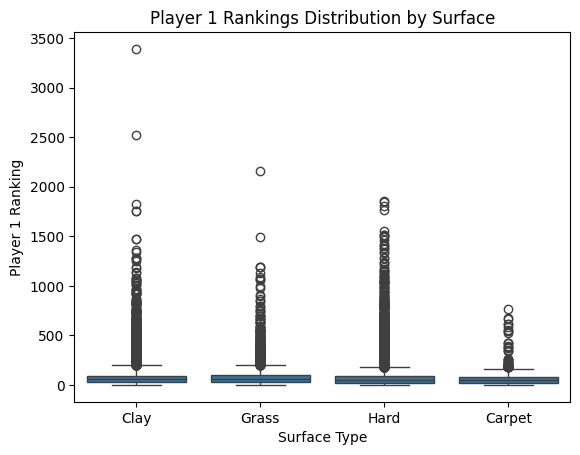

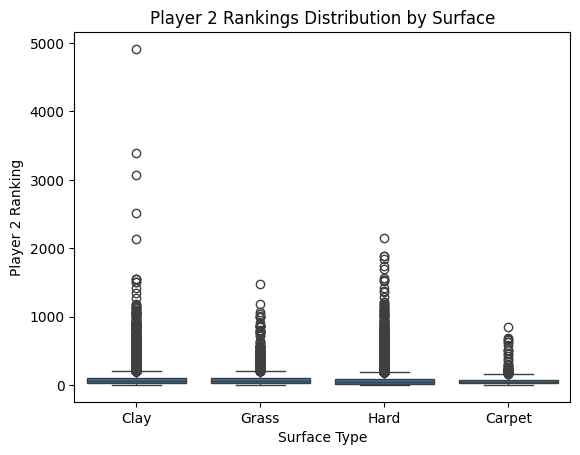

In [20]:
sns.boxplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Rankings Distribution by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Player 1 Ranking')
plt.show()

sns.boxplot(x='Surface', y='Rank_2', data=data)
plt.title('Player 2 Rankings Distribution by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Player 2 Ranking')
plt.show()


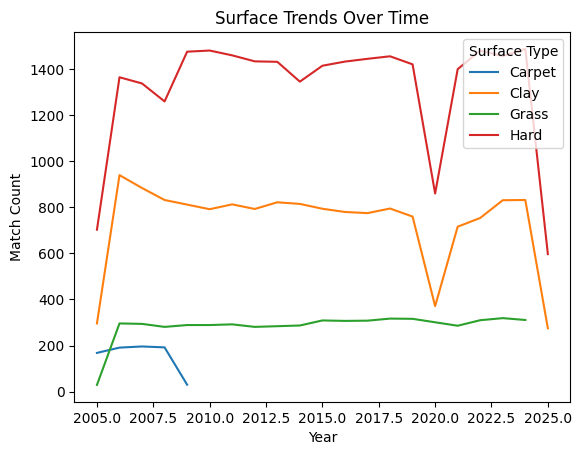

In [21]:
# Extract the year from the Date column
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Group data by year and surface
surface_trends = data.groupby(['Year', 'Surface']).size().reset_index(name='Match Count')

# Plot surface trends over time
sns.lineplot(x='Year', y='Match Count', hue='Surface', data=surface_trends)
plt.title('Surface Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Match Count')
plt.legend(title='Surface Type')
plt.show()


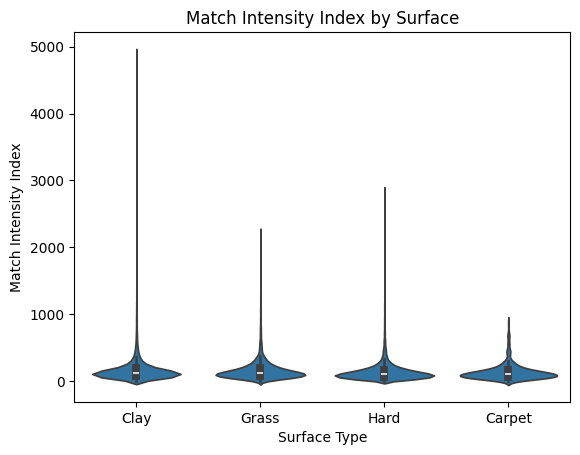

In [22]:
sns.violinplot(x='Surface', y='Match Intensity Index', data=data)
plt.title('Match Intensity Index by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Match Intensity Index')
plt.show()


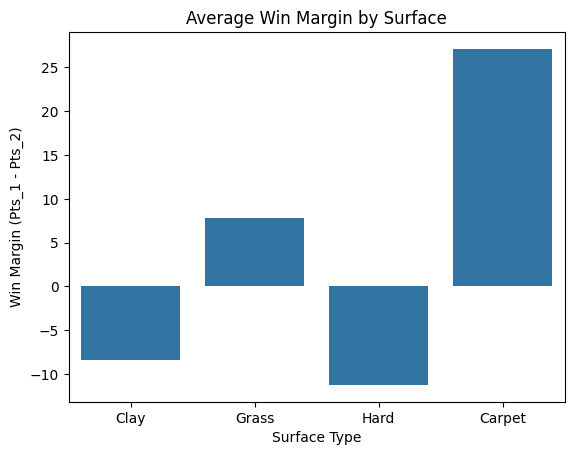

In [23]:
sns.barplot(x='Surface', y='Win Margin', data=data, errorbar=None)  # Fix for deprecated ci parameter
plt.title('Average Win Margin by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Win Margin (Pts_1 - Pts_2)')
plt.show()


In [24]:
# Conduct ANOVA test for Player 1 rankings across different surfaces
clay = data[data['Surface'] == 'Clay']['Rank_1']
grass = data[data['Surface'] == 'Grass']['Rank_1']
hard = data[data['Surface'] == 'Hard']['Rank_1']

f_stat, p_value = f_oneway(clay, grass, hard)
print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat}, p-value: {p_value}")

# Interpretation:
# If p-value < 0.05, reject the null hypothesis. Surface type significantly affects Player 1 rankings.



ANOVA Test Results:
F-statistic: 57.51834379940432, p-value: 1.1209817823730134e-25


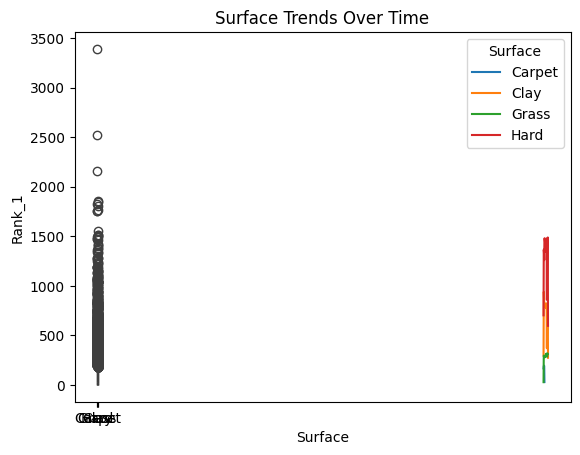

In [25]:
# Save plots
sns.boxplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Rankings Distribution by Surface')
plt.savefig('player1_rank_surface.png')

sns.lineplot(x='Year', y='Match Count', hue='Surface', data=surface_trends)
plt.title('Surface Trends Over Time')
plt.savefig('surface_trends_over_time.png')
